In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student.csv')

In [24]:
df['sex'] = df['sex'].replace({'F': 0, 'M': 1})
df['Pstatus'] = df['Pstatus'].replace({'A': 0, 'T': 1})

/var/folders/lr/j88t5txn53q1792_840bh3xr0000gp/T/ipykernel_22597/3234098679.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'F': 0, 'M': 1})
/var/folders/lr/j88t5txn53q1792_840bh3xr0000gp/T/ipykernel_22597/3234098679.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Pstatus'] = df['Pstatus'].replace({'A': 0, 'T': 1})


In [25]:
# selected_columns_D = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'Walc']
selected_columns_W = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health', 'Walc']

# df_D = df[selected_columns_D].copy()
df_W = df[selected_columns_W].copy()


In [28]:
# df_W['Walc'] = df_W['Walc'].astype(str)
# print(df_W.dtypes)
# df_W.to_csv('df_W.csv')

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

X = df_W[['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health']]
X = pd.get_dummies(X, columns=['Mjob', 'Fjob'])

y = df_W['Walc']


In [32]:
X

,sex,age,Pstatus,famrel,Medu,Fedu,goout,health,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,0,18,0,4,4,4,4,3,True,False,False,False,False,False,False,False,False,True
1,0,17,1,5,1,1,3,3,True,False,False,False,False,False,False,True,False,False
2,0,15,1,4,1,1,2,3,True,False,False,False,False,False,False,True,False,False
3,0,15,1,3,4,2,2,5,False,True,False,False,False,False,False,False,True,False
4,0,16,1,4,3,3,2,5,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,19,1,5,2,3,2,5,False,False,False,True,False,False,False,True,False,False
1040,0,18,1,4,3,1,4,1,False,False,False,False,True,False,False,False,True,False
1041,0,18,1,1,1,1,1,5,False,False,True,False,False,False,False,True,False,False
1042,1,17,1,2,3,1,5,2,False,False,False,True,False,False,False,False,True,False


In [33]:
from sklearn.utils import Bunch

dataset = {
    'data': X,
    'target': y,
    'DESCR': 'Student alcohol consumption during weekday',
    'feature_names': ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health'
                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],
    'target_names': ['very low', 'low', 'moderate', 'high', 'very high'],
}

bunch = Bunch(**dataset)

X = bunch.data
y = bunch.target

feature_names = bunch.feature_names
class_names = bunch.target_names

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)


In [57]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_) 

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6,
                       n_estimators=150)


In [60]:
random_search.best_estimator_

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6,
                       n_estimators=150)

In [49]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)

In [134]:
clf = RandomForestClassifier(criterion='log_loss', max_depth=9, min_samples_split=9, max_leaf_nodes=18, n_estimators=200, max_features=None, bootstrap=True, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc) #0.49282296650717705


accuracy: 0.49282296650717705


[Text(0.3181818181818182, 0.9285714285714286, 'famrel <= 1.5\nlog_loss = 2.32\nsamples = 523\nvalue = [158.867, 165.251, 185.0, 161.088, 175.946]\nclass = moderate'),
 Text(0.22727272727272727, 0.7857142857142857, 'log_loss = 1.594\nsamples = 12\nvalue = [3.253, 3.497, 3.0, 0.0, 14.911]\nclass = very high'),
 Text(0.4090909090909091, 0.7857142857142857, 'healthMjob_at_home <= 2.5\nlog_loss = 2.32\nsamples = 511\nvalue = [155.614, 161.754, 182.0, 161.088, 161.036]\nclass = moderate'),
 Text(0.18181818181818182, 0.6428571428571429, 'Fedu <= 2.5\nlog_loss = 2.129\nsamples = 117\nvalue = [36.87, 36.723, 52.0, 32.513, 5.964]\nclass = moderate'),
 Text(0.09090909090909091, 0.5, 'log_loss = 1.947\nsamples = 60\nvalue = [16.808, 17.487, 39.0, 4.434, 5.964]\nclass = moderate'),
 Text(0.2727272727272727, 0.5, 'log_loss = 1.949\nsamples = 57\nvalue = [20.062, 19.236, 13.0, 28.08, 0.0]\nclass = high'),
 Text(0.6363636363636364, 0.6428571428571429, 'Mjob_other <= 0.5\nlog_loss = 2.316\nsamples = 39

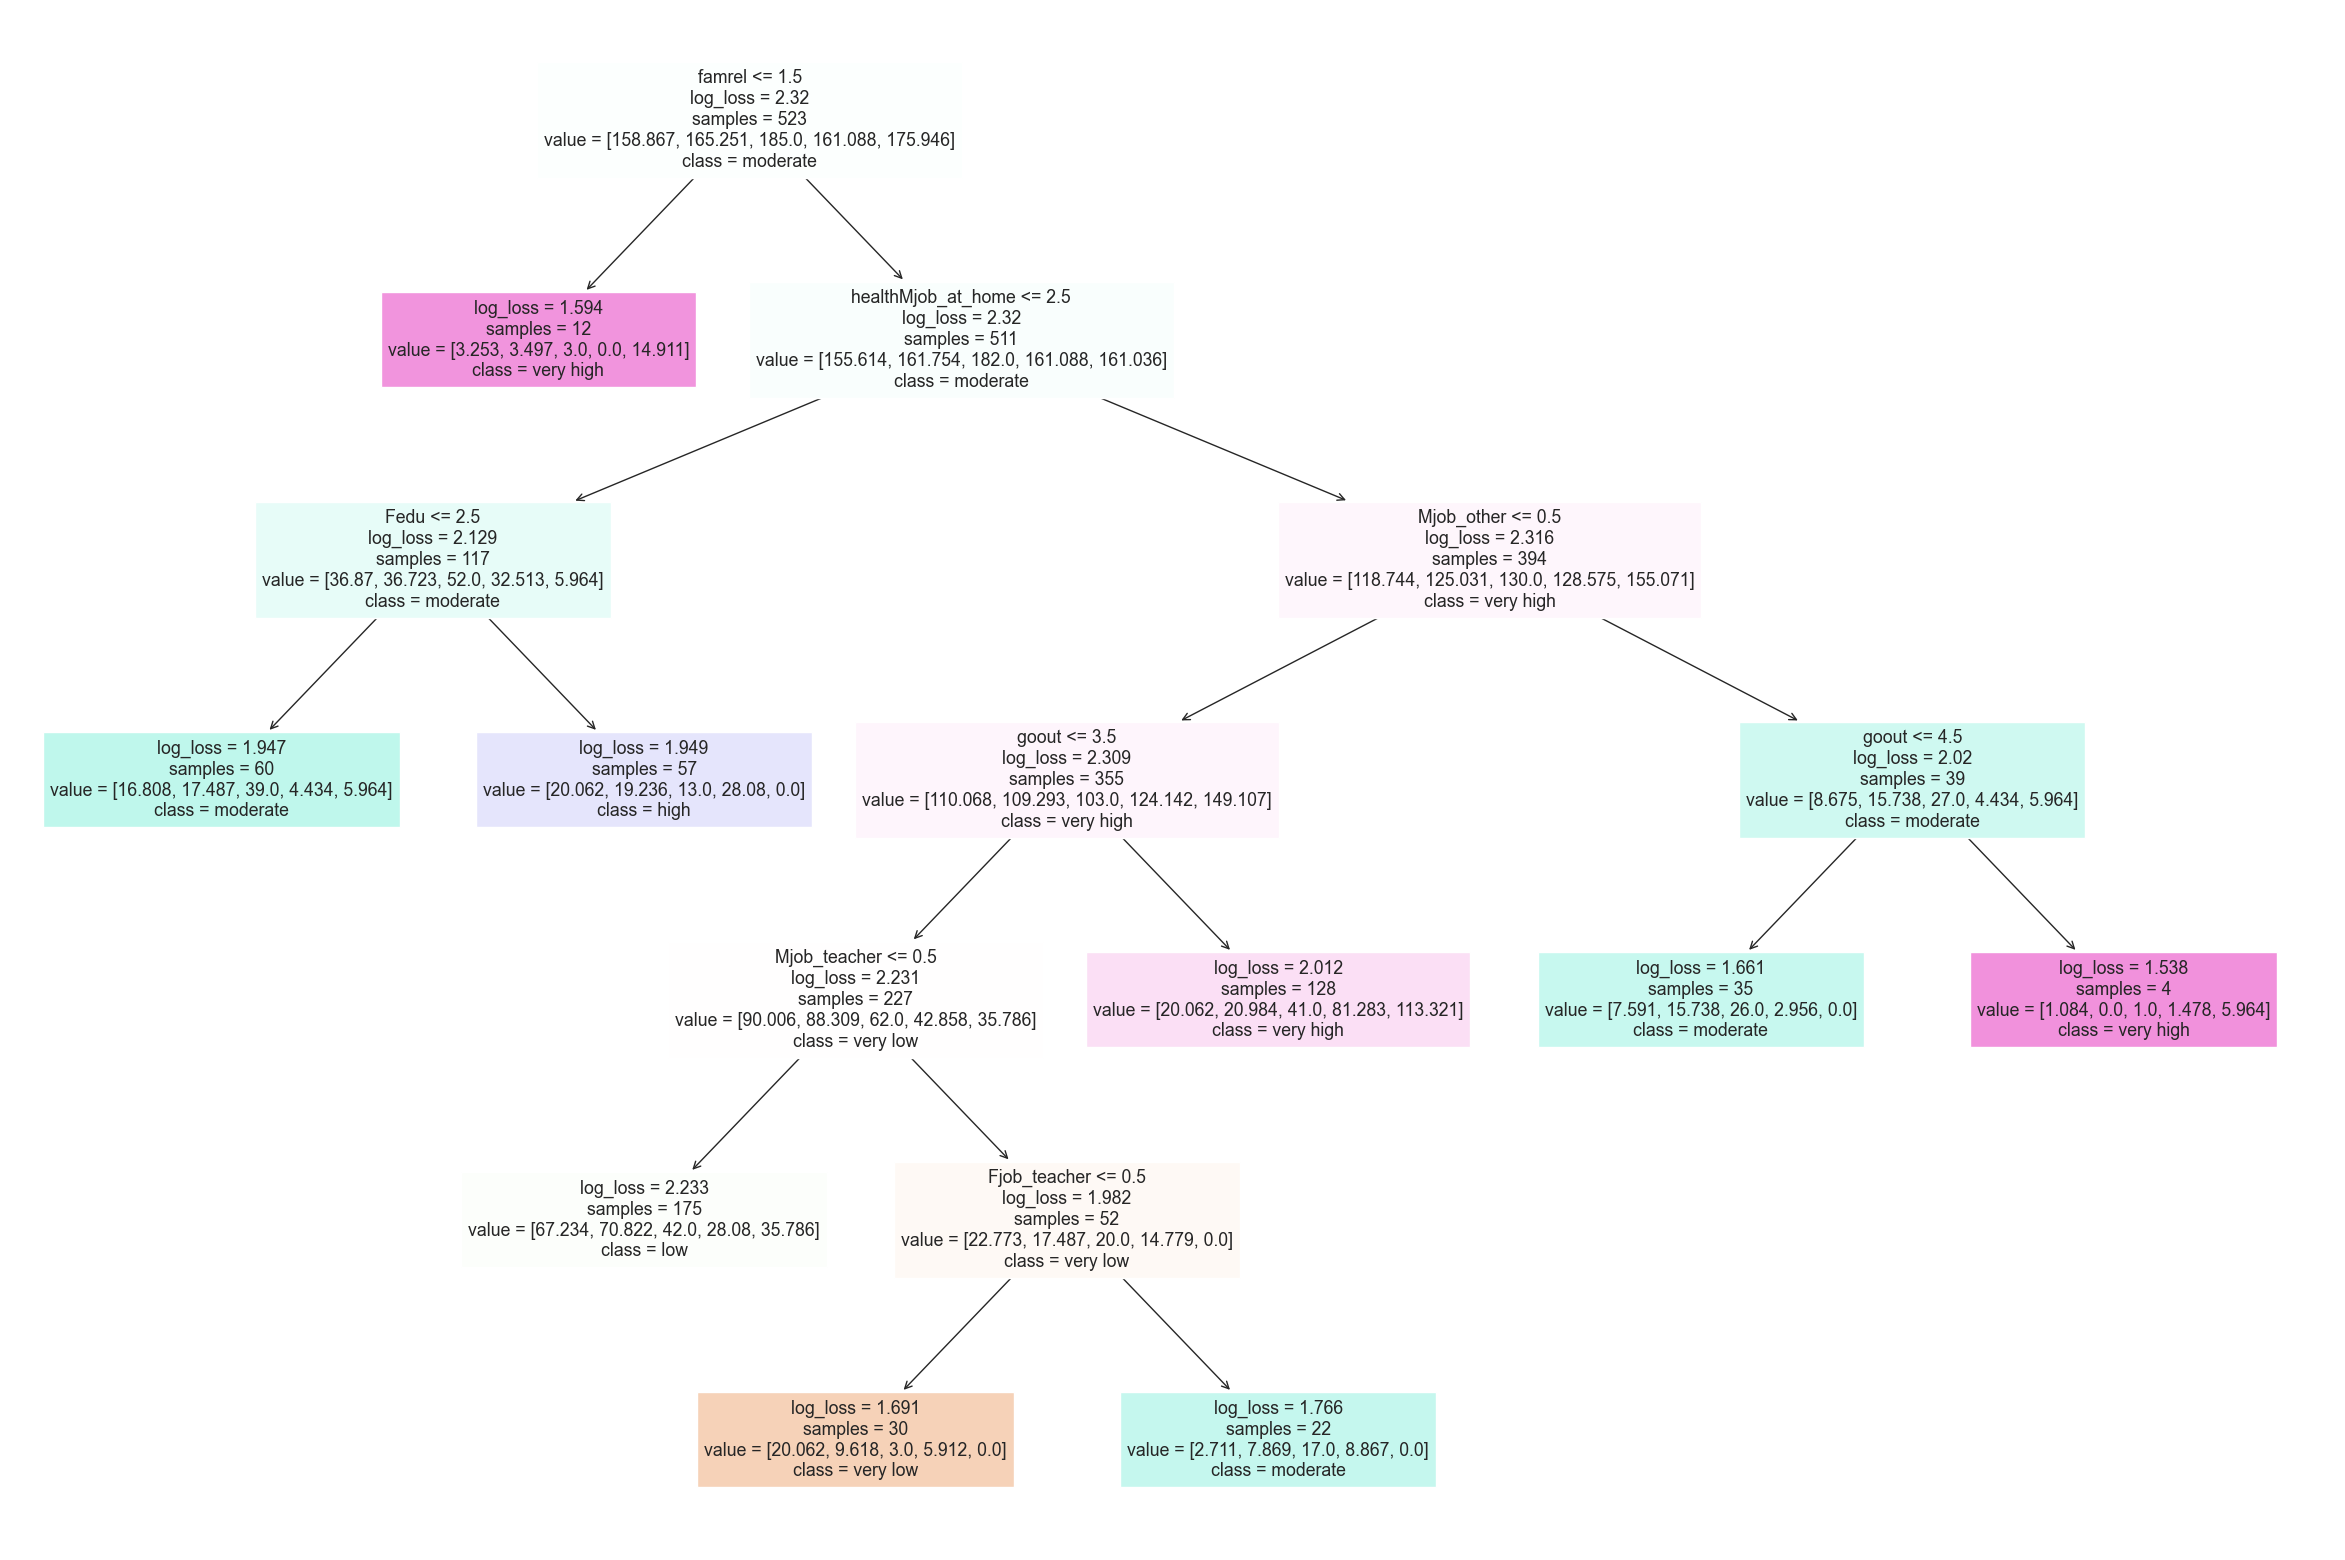

In [99]:
tree_to_plot = 2 

plt.figure(figsize=(30,20))
plt.rcParams['lines.linewidth'] = 0.3
plot_tree(clf.estimators_[tree_to_plot], feature_names=feature_names, filled=True, class_names=class_names)

In [100]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(clf.estimators_[0], out_file='random_forest.dot', feature_names=feature_names, filled=True, class_names=class_names)

source = Source.from_file('random_forest.dot', executable='E:/Python311/Lib/site-packages/graphviz/dot')
source.render('random_forest', format='pdf')

ValueError: Length of feature_names, 17 does not match number of features, 18

In [101]:
plt.figure(figsize=(30,20))
# plot_tree(clf, filled=True)
plt.rcParams['lines.linewidth'] = 0.3
# plot_tree(clf, feature_names=feature_names, filled=True, class_names=class_names)
plot_tree(clf, feature_names=X.columns, filled=True, class_names=y)
plt.savefig('DT_D.pdf', format='pdf', dpi=300)  

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=1000, random_state=42) instead.

<Figure size 3000x2000 with 0 Axes>